In [1]:
import cv2
import os

In [2]:
import tensorflow as tf 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from tensorflow.keras.preprocessing import image

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data_path='datasets'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [8]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print('Exception:',e)

In [9]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
new_target =tf.keras.utils.to_categorical(target)

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(data,new_target,test_size=0.3)

In [11]:
X_train.shape

(963, 100, 100, 1)

In [12]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(100,100,1))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=(100,100,1))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
trained_model=model.fit(X_train,Y_train,batch_size=32,epochs=8,validation_split=0.2)

Epoch 1/8
25/25 [==============================] - 36s 1s/step - loss: 0.7182 - accuracy: 0.5195 - val_loss: 0.6880 - val_accuracy: 0.5130
Epoch 2/8
25/25 [==============================] - 35s 1s/step - loss: 0.6682 - accuracy: 0.5740 - val_loss: 0.6029 - val_accuracy: 0.7617
Epoch 3/8
25/25 [==============================] - 36s 1s/step - loss: 0.5523 - accuracy: 0.7481 - val_loss: 0.5034 - val_accuracy: 0.7461
Epoch 4/8
25/25 [==============================] - 35s 1s/step - loss: 0.4113 - accuracy: 0.8325 - val_loss: 0.4383 - val_accuracy: 0.8135
Epoch 5/8
25/25 [==============================] - 35s 1s/step - loss: 0.2921 - accuracy: 0.8870 - val_loss: 0.3958 - val_accuracy: 0.8497
Epoch 6/8
25/25 [==============================] - 35s 1s/step - loss: 0.1886 - accuracy: 0.9494 - val_loss: 0.3566 - val_accuracy: 0.8808
Epoch 7/8
25/25 [==============================] - 35s 1s/step - loss: 0.1210 - accuracy: 0.9597 - val_loss: 0.3512 - val_accuracy: 0.8756
Epoch 8/8
25/25 [==========

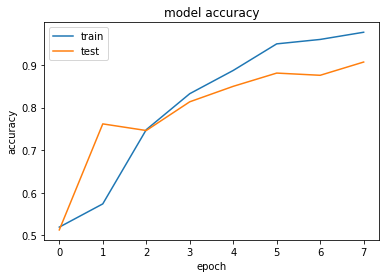

In [15]:
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

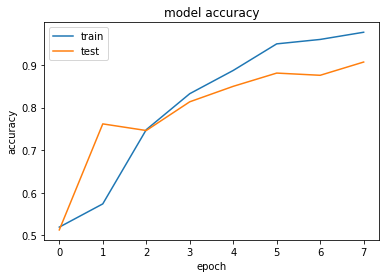

In [16]:
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [17]:
test_loss,test_acc=model.evaluate(X_test,Y_test)
print('Test accuracy:',test_acc)

13/13 [==============================] - 5s 404ms/step - loss: 0.2477 - accuracy: 0.9201
Test accuracy: 0.9200968742370605


In [18]:
Y_pred=model.predict(X_test)

In [19]:
Y_pred=Y_pred.argmax(axis=1)

In [20]:
Y_test=Y_test.argmax(axis=1)

In [21]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       211
           1       0.94      0.89      0.92       202

    accuracy                           0.92       413
   macro avg       0.92      0.92      0.92       413
weighted avg       0.92      0.92      0.92       413



1
with_mask


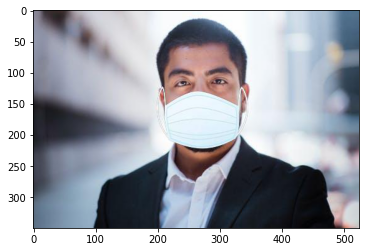

In [22]:
img = image.load_img('datasets/with_mask/13-with-mask.jpg',grayscale=True,target_size=(100,100))
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
x /= 255

custom = model.predict(x)
Y_p=custom.argmax(axis=1)
print(int(Y_p))
s=int(Y_p)
o=['without_mask', 'with_mask']
print(o[s])
img=mpimg.imread("datasets/with_mask/13-with-mask.jpg")
plt.imshow(img)

0
without_mask


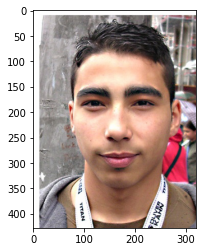

In [23]:
img = image.load_img('datasets/without_mask/65.jpg',grayscale=True,target_size=(100,100))
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
x /= 255

custom = model.predict(x)
Y_p=custom.argmax(axis=1)
print(int(Y_p))
s=int(Y_p)
o=['without_mask', 'with_mask']
print(o[s])
img=mpimg.imread("datasets/without_mask/65.jpg")
plt.imshow(img)

In [26]:
model.save('model2_project.h5')

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np
from numpy import loadtxt
from tensorflow.keras.models import load_model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
model = load_model('model2_project.h5')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

0
without_mask


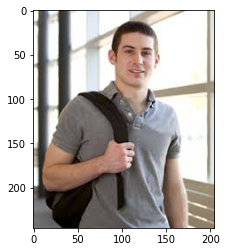

In [16]:
img = image.load_img('images01.jpg',grayscale=True,target_size=(100,100))
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
x /= 255

custom = model.predict(x)
Y_p=custom.argmax(axis=1)
print(int(Y_p))
s=int(Y_p)
o=['without_mask','with_mask']
print(o[s])
img=mpimg.imread("images01.jpg")
plt.imshow(img)

0
without_mask


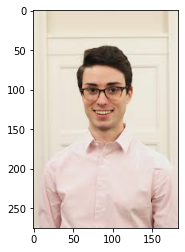

In [18]:
img = image.load_img('images02.jpg',grayscale=True,target_size=(100,100))
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
x /= 255

custom = model.predict(x)
Y_p=custom.argmax(axis=1)
print(int(Y_p))
s=int(Y_p)
o=['without_mask','with_mask']
print(o[s])
img=mpimg.imread("images02.jpg")
plt.imshow(img)

1
with_mask


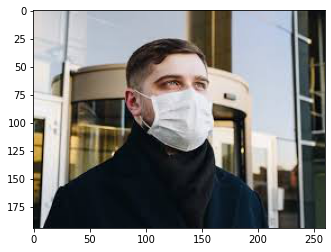

In [19]:
img = image.load_img('images03.jpg',grayscale=True,target_size=(100,100))
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
x /= 255

custom = model.predict(x)
Y_p=custom.argmax(axis=1)
print(int(Y_p))
s=int(Y_p)
o=['without_mask','with_mask']
print(o[s])
img=mpimg.imread("images03.jpg")
plt.imshow(img)

1
with_mask


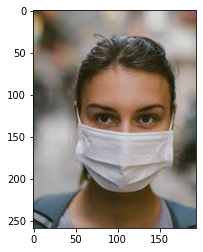

In [20]:
img = image.load_img('images04.jpg',grayscale=True,target_size=(100,100))
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
x /= 255

custom = model.predict(x)
Y_p=custom.argmax(axis=1)
print(int(Y_p))
s=int(Y_p)
o=['without_mask','with_mask']
print(o[s])
img=mpimg.imread("images04.jpg")
plt.imshow(img)